In [24]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import ast
from IPython.display import display, Image
from PIL import Image


In [25]:
battles_df=pd.read_csv("../Common/battle_logs_info.csv")
battles_df.head(1)

,isLadderTournament,arena,isHostedMatch,challengeId,challengeWinCountBefore,challengeTitle,boatBattleSide,newTowersDestroyed,prevTowersDestroyed,team,deckSelection,remainingTowers,opponent,gameMode,boatBattleWon,type,battleTime
0,False,"{'id': 54000038, 'name': 'Legendary Arena'}",False,NaN,NaN,NaN,NaN,NaN,NaN,"[{'tag': '#UVY0VJUP2', 'name': 'Beltron-_', 's...",eventDeck,NaN,"[{'tag': '#U00CCLC29', 'name': 'Gabriela', 'st...","{'id': 72000343, 'name': 'Event_GoblinPartyRoc...",NaN,seasonalBattle,20230403T030544.000Z


# Expansion of Columns from nested Columns

In [26]:
cards=[]
leak=[]
tags=[]
crowns=[]
kingTowerHitPoints=[]
princessTowersHitPoints=[]
for player_info_str in battles_df["team"]:
    player_info = ast.literal_eval(player_info_str)
    player_info_str= player_info[0]
    cards.append(player_info_str['cards'])
    leak.append(player_info_str['elixirLeaked'])
    tags.append(player_info_str['tag'])
    crowns.append(player_info_str['crowns'])
    kingTowerHitPoints.append(player_info_str['kingTowerHitPoints'])
    princessTowersHitPoints.append(player_info_str['princessTowersHitPoints'])

battles_df["pCards"]=cards
battles_df["pLeak"]=leak
battles_df["pTags"]=tags
battles_df["pCrowns"]=crowns
battles_df["pKingTowerHitPoints"]=kingTowerHitPoints
battles_df["pPrincessTowersHitPoints"]=princessTowersHitPoints
battles_df.drop(['team'], axis=1, inplace=True)
battles_df.head(1)

,isLadderTournament,arena,isHostedMatch,challengeId,challengeWinCountBefore,challengeTitle,boatBattleSide,newTowersDestroyed,prevTowersDestroyed,deckSelection,...,gameMode,boatBattleWon,type,battleTime,pCards,pLeak,pTags,pCrowns,pKingTowerHitPoints,pPrincessTowersHitPoints
0,False,"{'id': 54000038, 'name': 'Legendary Arena'}",False,NaN,NaN,NaN,NaN,NaN,NaN,eventDeck,...,"{'id': 72000343, 'name': 'Event_GoblinPartyRoc...",NaN,seasonalBattle,20230403T030544.000Z,"[{'name': None, 'id': 28000020, 'level': 3, 'm...",2.9,#UVY0VJUP2,1,3075,"[199, 1193]"


In [27]:
cards=[]
leak=[]
tags=[]
crowns=[]
kingTowerHitPoints=[]
princessTowersHitPoints=[]
for player_info_str in battles_df["opponent"]:
    player_info = ast.literal_eval(player_info_str)
    player_info_str= player_info[0]
    cards.append(player_info_str['cards'])
    leak.append(player_info_str['elixirLeaked'])
    tags.append(player_info_str['tag'])
    crowns.append(player_info_str['crowns'])
    kingTowerHitPoints.append(player_info_str['kingTowerHitPoints'])
    princessTowersHitPoints.append(player_info_str['princessTowersHitPoints'])

battles_df["oCards"]=cards
battles_df["oLeak"]=leak
battles_df["oTags"]=tags
battles_df["oCrowns"]=crowns
battles_df["oKingTowerHitPoints"]=kingTowerHitPoints
battles_df["oPincessTowersHitPoints"]=princessTowersHitPoints
battles_df.drop(['opponent'], axis=1, inplace=True)
battles_df.head(1)

,isLadderTournament,arena,isHostedMatch,challengeId,challengeWinCountBefore,challengeTitle,boatBattleSide,newTowersDestroyed,prevTowersDestroyed,deckSelection,...,pTags,pCrowns,pKingTowerHitPoints,pPrincessTowersHitPoints,oCards,oLeak,oTags,oCrowns,oKingTowerHitPoints,oPincessTowersHitPoints
0,False,"{'id': 54000038, 'name': 'Legendary Arena'}",False,NaN,NaN,NaN,NaN,NaN,NaN,eventDeck,...,#UVY0VJUP2,1,3075,"[199, 1193]","[{'name': None, 'id': 28000020, 'level': 3, 'm...",8.22,#U00CCLC29,0,3075,[1303]


In [28]:
for player_info_str in battles_df["gameMode"]:
    player_info = ast.literal_eval(player_info_str)
    battles_df["gameMode"]=player_info["name"]

battles_df.head(1)

,isLadderTournament,arena,isHostedMatch,challengeId,challengeWinCountBefore,challengeTitle,boatBattleSide,newTowersDestroyed,prevTowersDestroyed,deckSelection,...,pTags,pCrowns,pKingTowerHitPoints,pPrincessTowersHitPoints,oCards,oLeak,oTags,oCrowns,oKingTowerHitPoints,oPincessTowersHitPoints
0,False,"{'id': 54000038, 'name': 'Legendary Arena'}",False,NaN,NaN,NaN,NaN,NaN,NaN,eventDeck,...,#UVY0VJUP2,1,3075,"[199, 1193]","[{'name': None, 'id': 28000020, 'level': 3, 'm...",8.22,#U00CCLC29,0,3075,[1303]


# Remove Unnecessary Columns

In [29]:
battles_df.drop(["isLadderTournament","newTowersDestroyed","boatBattleWon","prevTowersDestroyed","challengeTitle","deckSelection","isHostedMatch","challengeId","boatBattleSide",'challengeWinCountBefore'], axis=1, inplace=True)
for i in battles_df:
    print(i)

arena
remainingTowers
gameMode
type
battleTime
pCards
pLeak
pTags
pCrowns
pKingTowerHitPoints
pPrincessTowersHitPoints
oCards
oLeak
oTags
oCrowns
oKingTowerHitPoints
oPincessTowersHitPoints


# Reorganised Data Representation

In [30]:
battle_log={}

battle_log["outcome"] = battles_df["pCrowns"] >battles_df["oCrowns"]
        
battle_log["tag"] = battles_df["pTags"]
battle_log["playerCrown"]= battles_df["pCrowns"]
battle_log["playerSideTower"] = battles_df["pPrincessTowersHitPoints"]
battle_log["playerKingTower"] = battles_df["pKingTowerHitPoints"]
battle_log["playerLeak"]= battles_df["pLeak"]

battle_log["opponentTag"] = battles_df["oTags"]
battle_log["opponentCrown"]= battles_df["oCrowns"]
battle_log["opponentSideTower"] = battles_df["oPincessTowersHitPoints"]
battle_log["opponentKingTower"] = battles_df["oKingTowerHitPoints"]
battle_log["opponentLeak"]= battles_df["oLeak"]

battle_log["player Deck"]= battles_df["pCards"]
battle_log["opponent Deck"] = battles_df["oCards"]



df=pd.DataFrame(battle_log)


In [31]:
df.head(1)

,outcome,tag,playerCrown,playerSideTower,playerKingTower,playerLeak,opponentTag,opponentCrown,opponentSideTower,opponentKingTower,opponentLeak,player Deck,opponent Deck
0,True,#UVY0VJUP2,1,"[199, 1193]",3075,2.9,#U00CCLC29,0,[1303],3075,8.22,"[{'name': None, 'id': 28000020, 'level': 3, 'm...","[{'name': None, 'id': 28000020, 'level': 3, 'm..."


# Cards Analysis

In [32]:
card_info=pd.read_csv("../Common/card_info.csv")
card_info=pd.DataFrame(card_info)
card_info.drop(["iconUrls"],axis=1,inplace=True)

Text(0.5, 0, 'Elixir Cost')

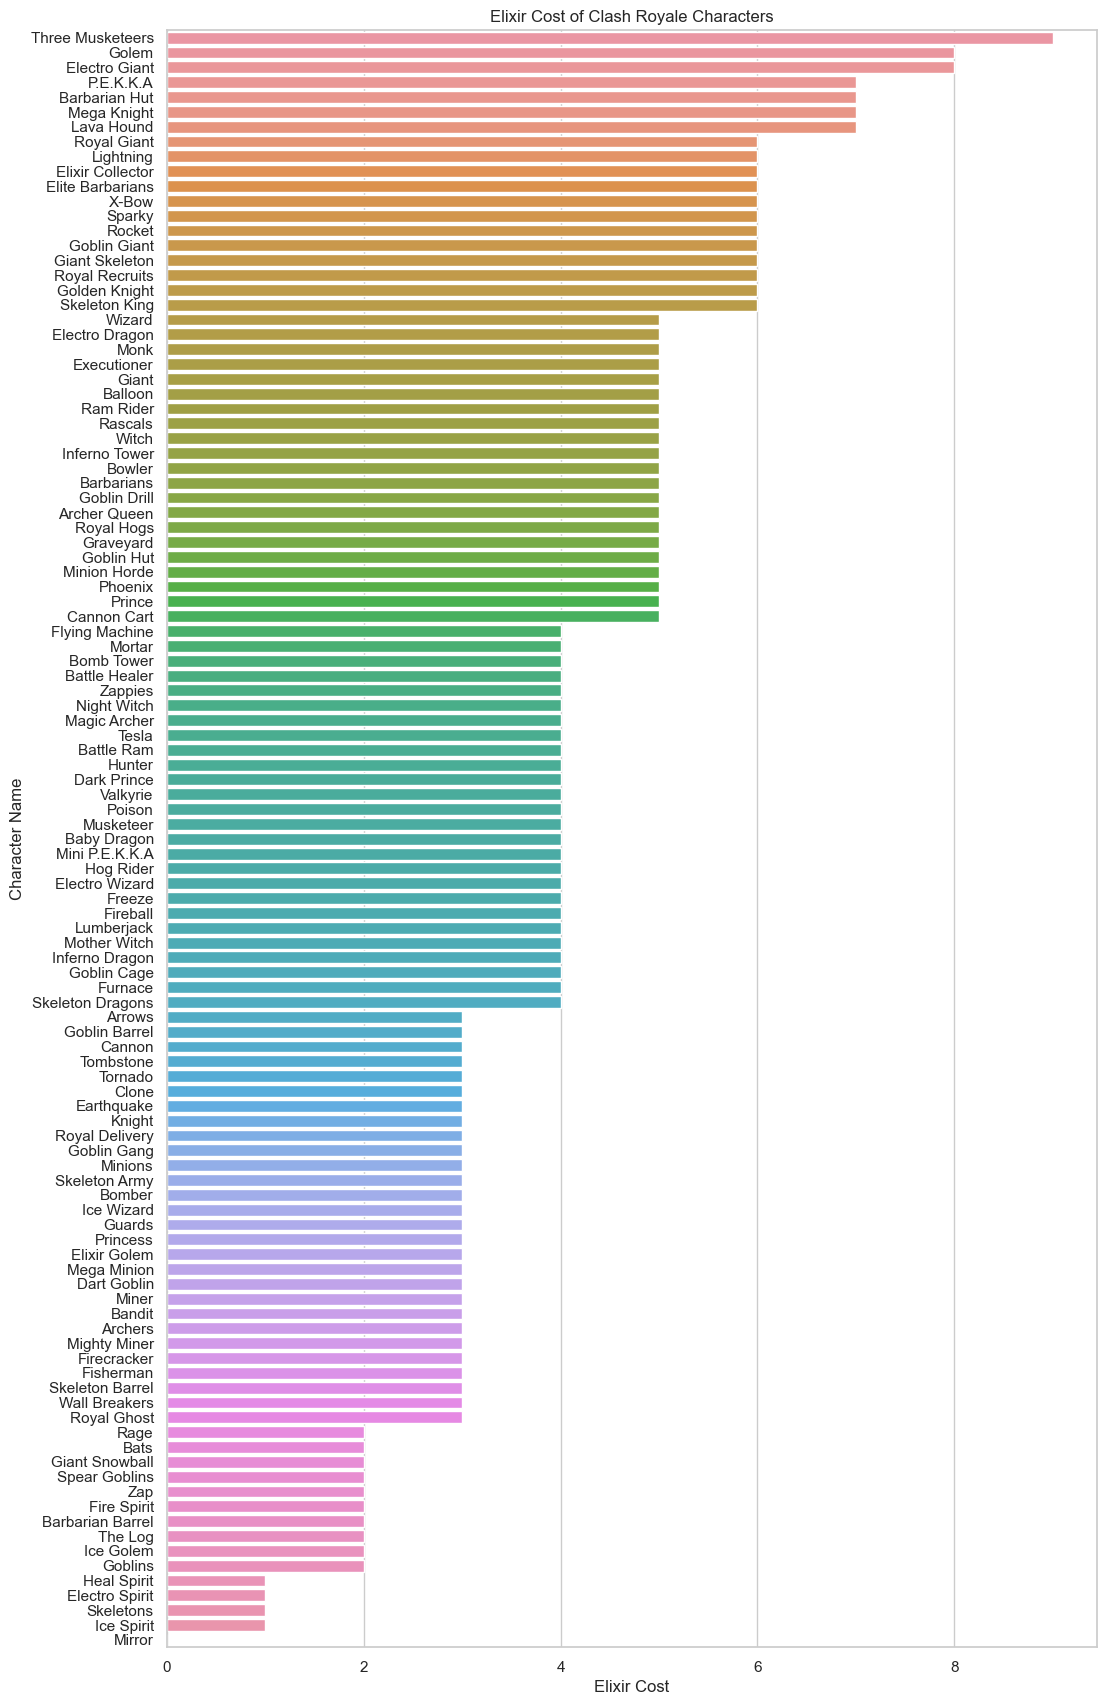

In [33]:
card_info_sorted= card_info.sort_values('elixirCost', ascending=False)

sb.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,21))
ax = sb.barplot(y=card_info_sorted['name'], x=card_info_sorted['elixirCost'])

# Customize the plot
ax.set_title("Elixir Cost of Clash Royale Characters")
ax.set_ylabel("Character Name")
ax.set_xlabel("Elixir Cost")

In [34]:
card_elixir = dict(zip(card_info['name'], card_info['elixirCost']))

# Player Deck Analysis
We will first analyse the players deck, We can uterlise both player and opponent, depending on who is the winner. We will determine from initial analysis the following 
1. Average elixir Cost
2. Best exlixir Cost that won
3. Most Common Deck
4. Most Common Deck that won
5. Most Common Card
6. Most Common Card that won

## Making Custom DataFrame

In [35]:
card_analysis = pd.DataFrame(df['outcome'])

player_decks = []
player_average_elixir=[]
opponent_decks = []
opponent_average_elixir=[]

for index, row in df.iterrows():
    # Get player deck and opponent deck
    player_deck = [card['name'] for card in row['player Deck']]
    opponent_deck = [card['name'] for card in row['opponent Deck']]
    p_elixir_average=0
    o_elixir_average=0
    for i in player_deck:
        if(i)==None:
            continue
        p_elixir_average+=card_elixir[i]
    for i in opponent_deck:
        if(i)==None:
            continue
        o_elixir_average+=card_elixir[i]
    # Add decks to lists
    player_average_elixir.append(p_elixir_average/len(player_deck))
    player_decks.append(player_deck)
    opponent_decks.append(opponent_deck)
    opponent_average_elixir.append(o_elixir_average/len(opponent_deck))
    
    # Add outcome to DataFrame

# Add player and opponent deck columns
card_analysis['Player Deck'] = player_decks
card_analysis['Opponent Deck'] = opponent_decks
card_analysis['Player Average Elixir']= player_average_elixir
card_analysis['Opponent Average Elixir']= opponent_average_elixir
card_analysis=card_analysis.dropna()
card_analysis.head(2)


,outcome,Player Deck,Opponent Deck,Player Average Elixir,Opponent Average Elixir
0,True,"[None, Mini P.E.K.K.A, Ram Rider, Wizard, Dark...","[None, Ice Spirit, Skeletons, Fire Spirit, Can...",3.25,1.625
1,True,"[None, Mini P.E.K.K.A, Ram Rider, Wizard, Dark...","[None, Miner, Wizard, Prince, Arrows, Princess...",3.25,3.125


## 1. Average Elixir Cost

<AxesSubplot:xlabel='Opponent Average Elixir', ylabel='Count'>

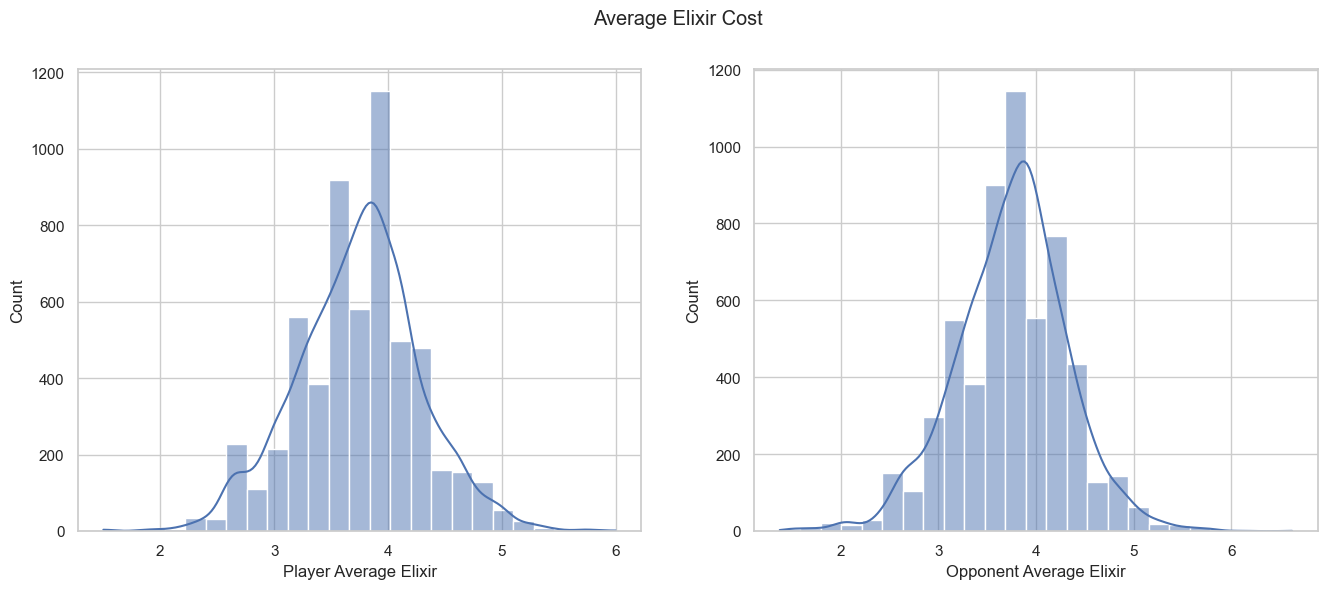

In [36]:
f, axes = plt.subplots(1,2, figsize=(16, 6))
f.suptitle("Average Elixir Cost")
sb.histplot(x = card_analysis["Player Average Elixir"], bins=25,ax=axes[0], kde=True)
sb.histplot(x = card_analysis["Opponent Average Elixir"], bins=25,ax=axes[1], kde=True)

## 2. Best Elixir Cost That Won

Number of Won by Player: 2746
Number of Won by Opponent: 3004


<AxesSubplot:xlabel='Opponent Average Elixir', ylabel='Count'>

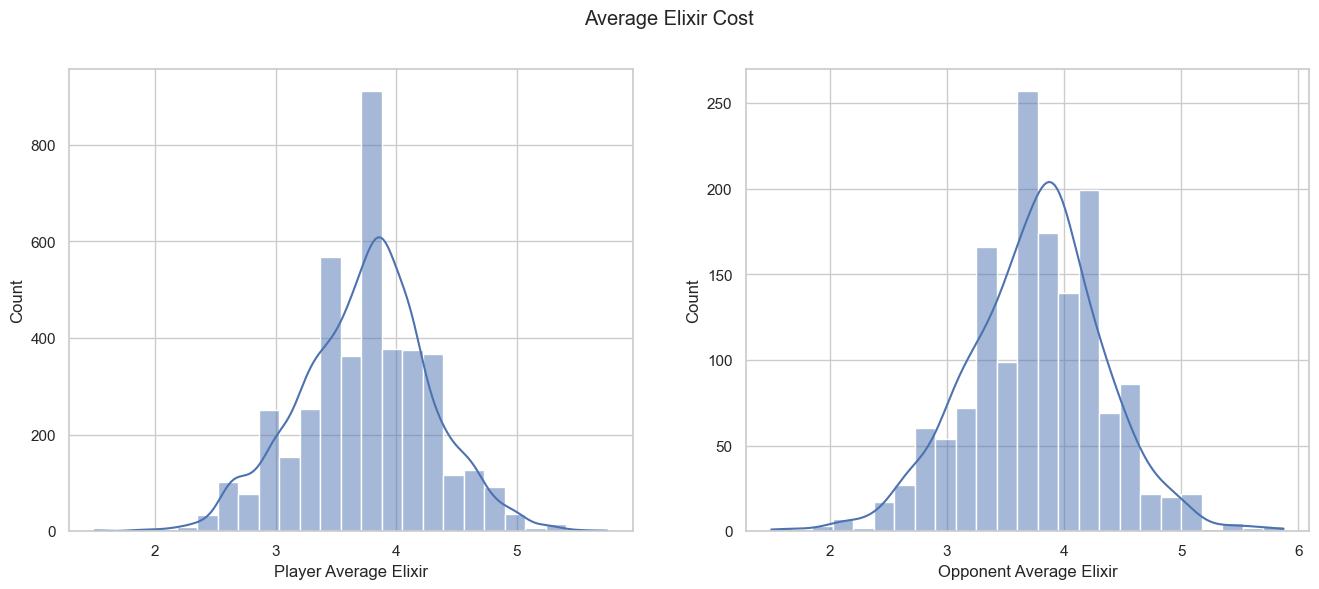

In [37]:
f, axes = plt.subplots(1,2, figsize=(16, 6))
f.suptitle("Average Elixir Cost")
df_sorted = card_analysis.sort_values('outcome', ascending=False)
count=0
total=0
for i in df_sorted['outcome']:
    total+=1
    if i:
        count+=1
print("Number of Won by Player:", count)
print("Number of Won by Opponent:", total-count)
sb.histplot(x =df_sorted["Player Average Elixir"][:4241], bins=25,ax=axes[0], kde=True)
sb.histplot(x =df_sorted["Opponent Average Elixir"][4241:], bins=25, kde=True,ax=axes[1])

## 3. Most Common Deck

The 1 most common deck is ['Cannon', 'Fireball', 'Hog Rider', 'Ice Golem', 'Ice Spirit', 'Musketeer', 'Skeletons', 'The Log'] with a count of 54.


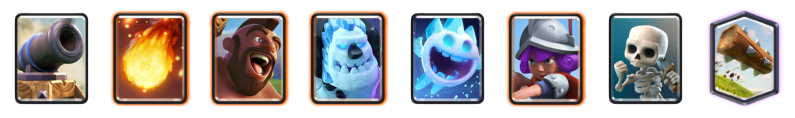

The 2 most common deck is ['Bandit', 'Battle Ram', 'Electro Wizard', 'Fireball', 'Magic Archer', 'P.E.K.K.A', 'Royal Ghost', 'Zap'] with a count of 26.


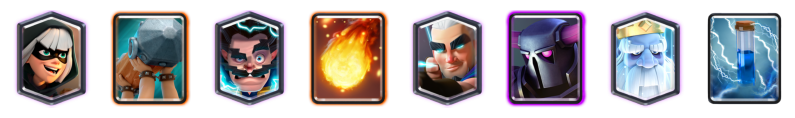

The 3 most common deck is ['Dart Goblin', 'Goblin Barrel', 'Inferno Tower', 'Knight', 'Princess', 'Skeleton Army', 'Skeleton Barrel', 'The Log'] with a count of 21.


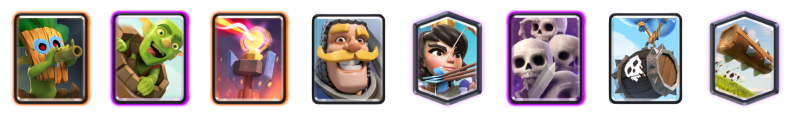

In [41]:
sort_and_replace_none = lambda x: sorted([str(e) if isinstance(e, str) else str(e) for e in x])

card_counts = pd.Series(card_analysis['Player Deck'].dropna().apply(sort_and_replace_none)).value_counts()

# Print the top 3 most frequent lists and their counts
top_decks = card_counts.index[:3]
for i, deck in enumerate(top_decks):
    deck_count = card_counts[i]
    print(f"The {i+1} most common deck is {deck} with a count of {deck_count}.")
    
    fig, axs = plt.subplots(1, len(deck), figsize=(10, 4))
    for j, card in enumerate(deck):
        image = f"../Common/Cards Images/{card}.png"
        axs[j].imshow(plt.imread(image))
        axs[j].axis('off')
        
    plt.show()


## 4. Most Common Deck That Won

The 1 most common deck is ['Cannon', 'Fireball', 'Hog Rider', 'Ice Golem', 'Ice Spirit', 'Musketeer', 'Skeletons', 'The Log'] with a count of 10.


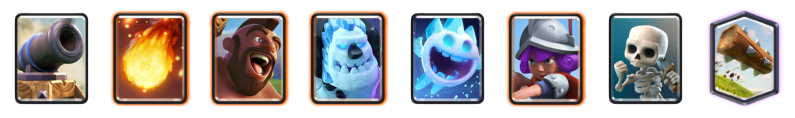

The 2 most common deck is ['Bomb Tower', 'Magic Archer', 'Miner', 'Skeletons', 'The Log', 'Tornado', 'Valkyrie', 'Wall Breakers'] with a count of 5.


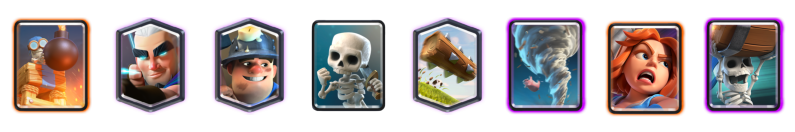

The 3 most common deck is ['Goblin Barrel', 'Goblin Gang', 'Ice Spirit', 'Inferno Tower', 'Knight', 'Princess', 'Rocket', 'The Log'] with a count of 5.


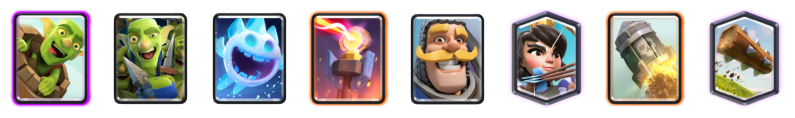

In [43]:
# Sort the dataframe by outcome
df_sorted = card_analysis.sort_values('outcome', ascending=False)

# Separate the dataframe into winning and losing dataframes
df_win = df_sorted[:4241]
df_lost = df_sorted[4241:]

# Define a lambda function to sort and replace None values
sort_and_replace_none = lambda x: sorted([str(e) if isinstance(e, str) else str(e) for e in x])

# Get the value counts for the player decks in the winning dataframe
card_counts = pd.Series(df_lost['Opponent Deck'].dropna().apply(sort_and_replace_none)).value_counts()

# Get the top 3 most common decks and their counts
top_decks = card_counts.index[:3]
for i, deck in enumerate(top_decks):
    deck_count = card_counts[i]
    print(f"The {i+1} most common deck is {deck} with a count of {deck_count}.")
    
    # Create a subplot for each card in the deck
    fig, axs = plt.subplots(1, len(deck), figsize=(10, 4))
    for j, card in enumerate(deck):
        image = f"../Common/Cards Images/{card}.png"
        axs[j].imshow(plt.imread(image))
        axs[j].axis('off')
        
    plt.show()


## 5. Most Common Card (Elixir ALso)

The most common card is Giant. The Giant has a Elixir Cost of 5 


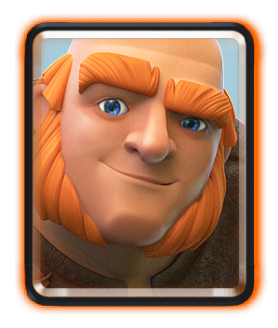

In [40]:
player_df=pd.read_csv("../Common/player_info.csv")
player_df = player_df.dropna(subset=["currentFavouriteCard"])
card_names=[]
for detail in player_df["currentFavouriteCard"]:
    detail= ast.literal_eval(detail)
    card_names.append(detail["name"])
card_counts = pd.Series(card_names).value_counts()
most_common_card = card_counts.index[0]
filtered_df = card_info[card_info['name'] == f"{most_common_card}"]
elixirCost=filtered_df["elixirCost"].iloc[0]

print(f"The most common card is {most_common_card}. The Giant has a Elixir Cost of {elixirCost} ")

fig, axs = plt.subplots(1, figsize=(10, 4))
image = f"../Common/Cards Images/{most_common_card}.png"
axs.imshow(plt.imread(image))
axs.axis('off')
plt.show()